In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
import os
# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Предобработка данных
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [482]:
# Код
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.regularizers import l1, l2
# from keras.layers import Dropout
# from keras.layers import BatchNormalization


# # Создание модели
# model = Sequential()
# model.add(Dense(256, input_shape=(784,), activation='relu'))
# model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Dense(10, activation='sigmoid',kernel_regularizer=l2(0.01)))

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1, l2
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D, Flatten

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [3]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(x_train, y_train, epochs=300, batch_size=4096*8, validation_split=0.2, callbacks=[early_stopping])
hist = model.fit(x_train, y_train, epochs=10, batch_size=4096*8, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/300


2/2 [==============================] - 3s 1s/step - loss: 2.1914 - accuracy: 0.2407 - val_loss: 1.4728 - val_accuracy: 0.7252
Epoch 2/300
2/2 [==============================] - 3s 1s/step - loss: 1.3819 - accuracy: 0.7189 - val_loss: 0.8569 - val_accuracy: 0.8204
Epoch 3/300
2/2 [==============================] - 3s 1s/step - loss: 0.8385 - accuracy: 0.8088 - val_loss: 0.5780 - val_accuracy: 0.8494
Epoch 4/300
2/2 [==============================] - 3s 1s/step - loss: 0.5912 - accuracy: 0.8401 - val_loss: 0.4480 - val_accuracy: 0.8743
Epoch 5/300
2/2 [==============================] - 3s 1s/step - loss: 0.4746 - accuracy: 0.8652 - val_loss: 0.3851 - val_accuracy: 0.8866
Epoch 6/300
2/2 [==============================] - 3s 999ms/step - loss: 0.4131 - accuracy: 0.8775 - val_loss: 0.3511 - val_accuracy: 0.8977
Epoch 7/300
2/2 [==============================] - 3s 1s/step - loss: 0.3766 - accuracy: 0.8879 - val_loss: 0.3297 - val_accuracy: 0.9049
Epoch 8/300
2/2 [============

KeyboardInterrupt: 

In [485]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 0s 849us/step - loss: 0.1488 - accuracy: 0.9816
Test Accuracy: 0.9815999865531921


In [486]:
model.save('model_best.keras')

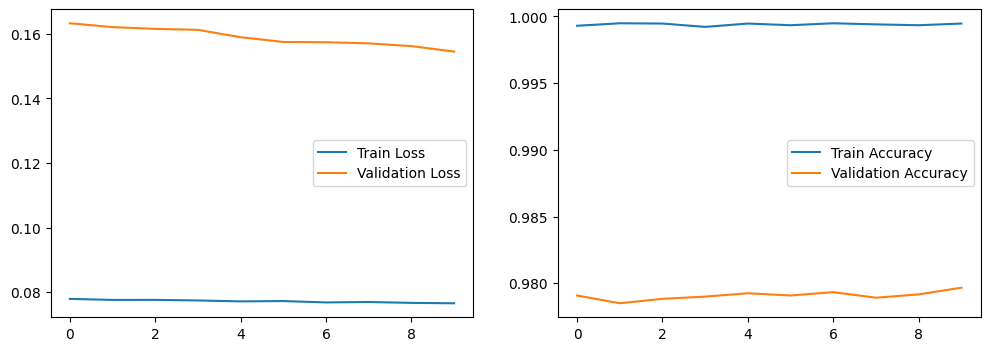

In [487]:
hist.history['accuracy']

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()

1/1 [==============================] - 0s 44ms/step
7


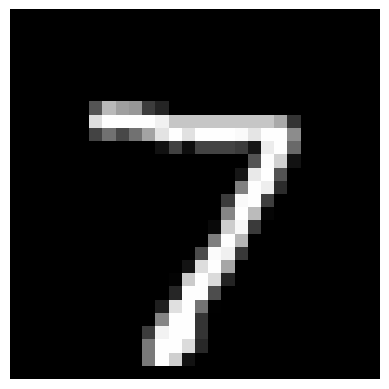

2


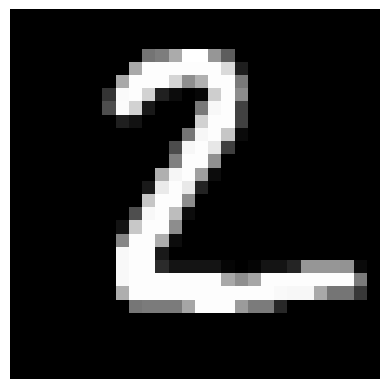

1


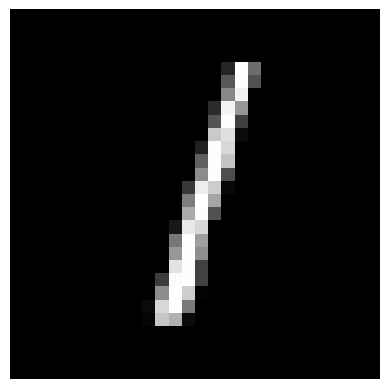

0


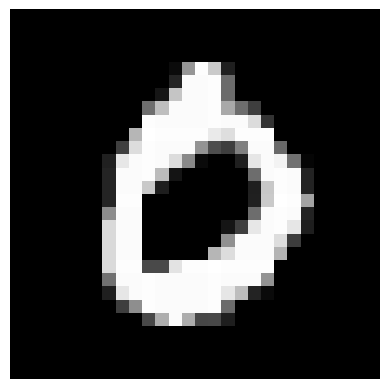

4


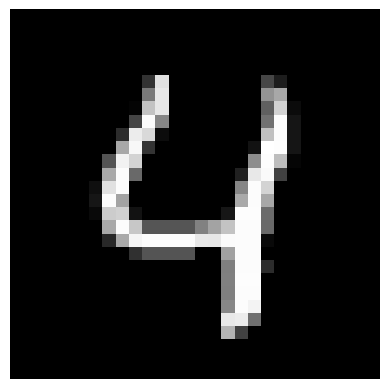

In [488]:
import numpy as np
import matplotlib.pyplot as plt
# predictions = model.predict(np.array([x_test[5]]))
predictions = model.predict(x_test[:5])

def get_class_number(arr):
    max_index = np.argmax(arr)
    return max_index

for i in range(len(predictions)):
    print(get_class_number(predictions[i]))
    plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 15ms/step
Predicted class: 7


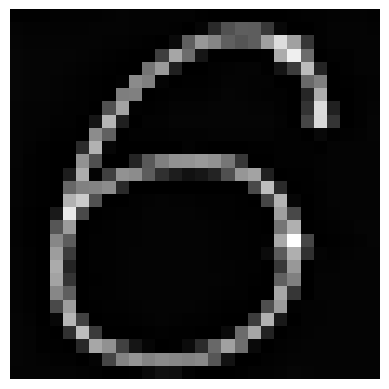

In [489]:
from keras.preprocessing import image
import numpy as np

from PIL import Image
import numpy as np

img_path = 'photo6.jpg'
img = Image.open(img_path).convert('L')  # 'L' для конвертации в оттенки серого
img = img.resize((28, 28))  # Размер целевого изображения

img_array = np.array(img)

img_array = 1 - img_array.reshape((1, -1)).astype('float32') / 255.0

predictions = model.predict(img_array)
def get_class_number(arr):
    max_index = np.argmax(arr)
    return max_index
print("Predicted class:", get_class_number(predictions))
import matplotlib.pyplot as plt

# Предполагая, что img_array содержит предобработанные данные изображения
plt.imshow(img_array.reshape((28, 28)), cmap='gray')  # Предполагается, что изображение в оттенках серого
plt.axis('off')  # Отключение осей
plt.show()

